# SciPy for scientific computing: sound analysis -- MCEN 1030 -- 21 Nov

SciPy is a HUGE set of functions for scientific computing, including integration tools, numerical differential equations solvers. Let's look at something practical (there is math in there too but we'll gloss over) -- sound analysis.

## Background

We are going to talk about a very practical mathematical tool for analyzing electrical signals, sound waves, etc. It's called the Fourier Transform, but we won't go into the math. Instead will focus on a practical use: we can take an input signal, as a function of time, and decompose it into its frequency content. For example, the following signal is made up of a certain amount of sine wave at a frequency of 1.3, and a certain amount of sine wave at a frequency 2.1.

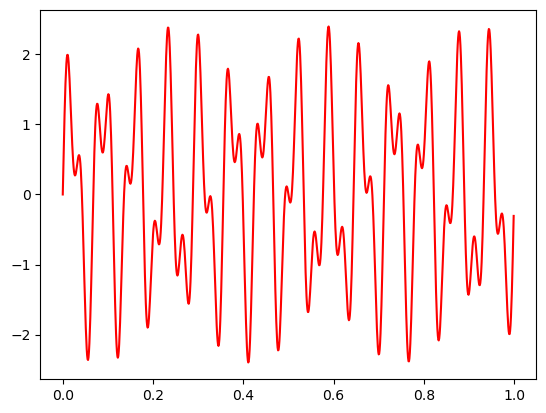

In [128]:
import numpy as np
import matplotlib.pyplot as plt

dt=0.001
t_final=1
t=np.arange(0,t_final,dt)
x=1.5*np.sin(14*2*np.pi*t)+0.9*np.sin(31*2*np.pi*t)
plt.plot(t,x,'r')
plt.show()

## A practical use

Below we will make the signal above "noisy", e.g. add some TV static

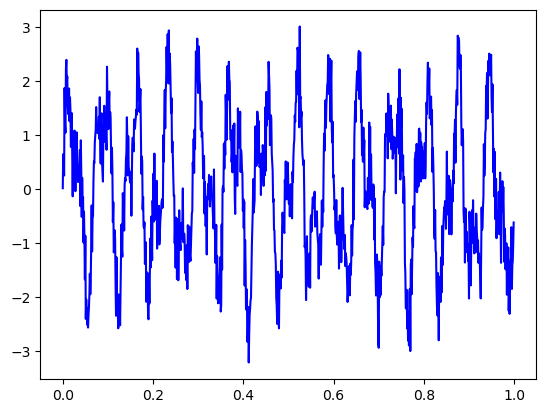

In [130]:
x_noise=x+0.4*np.random.normal(size=len(x))
plt.plot(t,x_noise,'b')
plt.show()

A very common challenge in engineering is to "separate the signal from the noise". But how to do it?

## SciPy signal package

Try this:

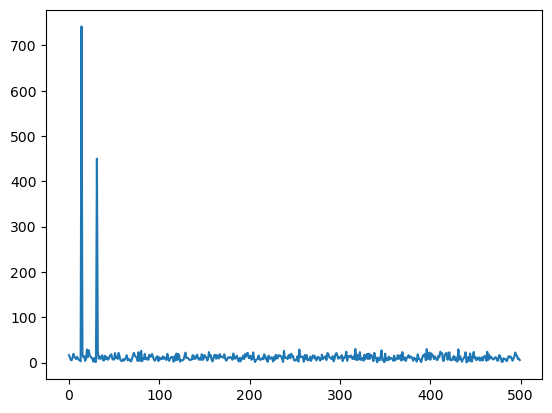

In [137]:
from scipy.fftpack import fft, fftfreq

N=len(x_noise)
y=fft(x_noise,N)
power=abs(y)
freq=fftfreq(N, dt)
plt.plot(freq[:N//2],power[:N//2])
plt.show()

In [ ]:
Below: Do some coding to figure out where those peaks are located.

In [ ]:
# code here

## Another signal

Put bwomrg.wav in your working directory.

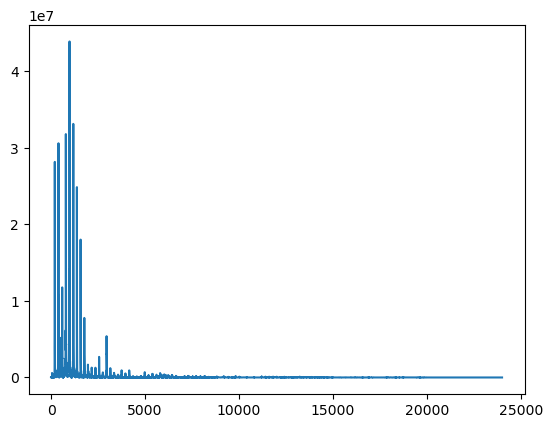

In [174]:
from scipy.io import wavfile

sample_rate, audio_data = wavfile.read('bwomrg.wav')
audio_data=np.mean(audio_data, axis=1)

t_audio=sample_rate*np.arange(0,len(audio_data))

N=len(audio_data)
y=fft(audio_data,N)
power=abs(y)
freq=fftfreq(N, 1/sample_rate)

plt.plot(freq[:N//2],power[:N//2])

plt.show()

In [160]:
# Where is the peak? Should be a multiple of 196...

4.9941061396468704


## One last, related application

The following package looks at the frequency data over time and makes a really neat plot...

/var/folders/cd/wc1c5dmn6c38w61k6g6skb9r0000gn/T/ipykernel_1996/4004453153.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(power), shading='gouraud', cmap='viridis')


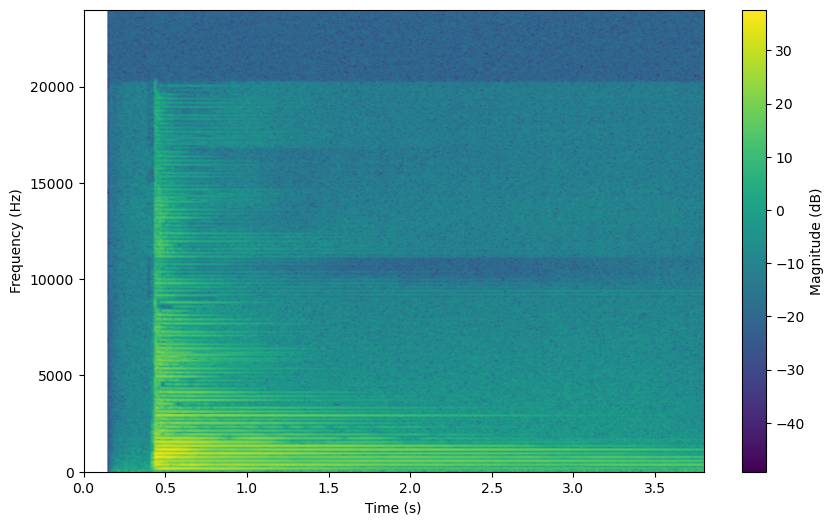

In [180]:
from scipy.signal import stft

window_size = 1024
noverlap = 512
nfft = 1024
frequencies, times, y = stft(audio_data, fs=sample_rate, nperseg=window_size, noverlap=noverlap, nfft=nfft)
power= np.abs(y)

plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(power), shading='gouraud', cmap='viridis')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Magnitude (dB)")
plt.show()